<a href="https://colab.research.google.com/github/biruk-tafese/MachineLearingIntern/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checks whether our data is empty

Data Cleaning -

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
def scatter_plot(title, y_predict):
  plt.figure(figsize=(12,12))
  plt.xticks(rotation=90)
  plt.title(title,fontsize = 16)
  plt.xlabel('Actual',fontsize = 15)
  plt.ylabel('Predictions', fontsize =15)
  plt.scatter(y_test,y_predict)
  plt.show()


In [9]:
crop_data= pd.read_csv("crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
crop_data.shape   #number of rows and columns


(2200, 8)

In [11]:
#misssingvalues
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
#describing the dataset
crop_data.describe()

After running this code, the variable "x" will contain the feature variables of the dataset, which you can use for further data analysis, preprocessing, or modeling.

In [ ]:
#creating feature varible using attribute of pandas

x = crop_data.iloc[:,:-1]
x


After running this code, the variable y will contain the target variable values of the dataset. You can use the x and y variables (feature and target variables) for further data analysis, preprocessing, and machine learning modeling. The x variable represents the feature variables, and the y variable represents the corresponding target variable.








In [16]:
#creating target variable

y = crop_data.iloc[:,-1]
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [19]:
#Splitting the dataset in test and train.
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

#Normalization


In [20]:
x_train.shape # displaying number of rows and columns of training feature set

(1760, 7)

In [21]:
y_train.shape # displaying number of rows and columns of training label set

(1760,)

In [22]:
x_test.shape

(440, 7)

In [23]:
y_test.shape

(440,)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Create a MinMaxScaler object
x_train_normalized = scaler.fit_transform(x_train)  # Normalize the training set
x_test_normalized = scaler.transform(x_test)        # Normalize the testing set using the same scaler


#Standardization


In [28]:
#importing K-Nearest Neighbor classifier - for classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   # Create a StandardScaler object
x_train_standardized = scaler.fit_transform(x_train)  # Standardize the training set
x_test_standardized = scaler.transform(x_test)       # Standardize the testing set using the same scaler

#x_test_normalized
x_test_standardized

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

In [34]:
knn_train_accuracy = knn.score(x_train, y_train)*100
knn_train_accuracy

98.97727272727272

In [36]:
y_predict_knn = knn.predict(x_test)
y_predict_knn


array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'cotton',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'jute',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [37]:
#importing confusion matrix and classification report - helps to identify the performance of the classified model
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(confusion_matrix(y_test, y_predict_knn))


[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [40]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

Precision: It measures the proportion of correctly predicted positive instances (i.e., true positives) among all instances predicted as positive. A precision of 1.00 means that the classifier correctly identified all instances of the class.

Recall: It measures the proportion of correctly predicted positive instances (i.e., true positives) among all actual positive instances. A recall of 1.00 means that the classifier correctly captured all positive instances of the class.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a classifier's performance. It ranges from 0 to 1, with 1 being the best score.

Support: The support indicates the number of samples in the test data that belong to each class.

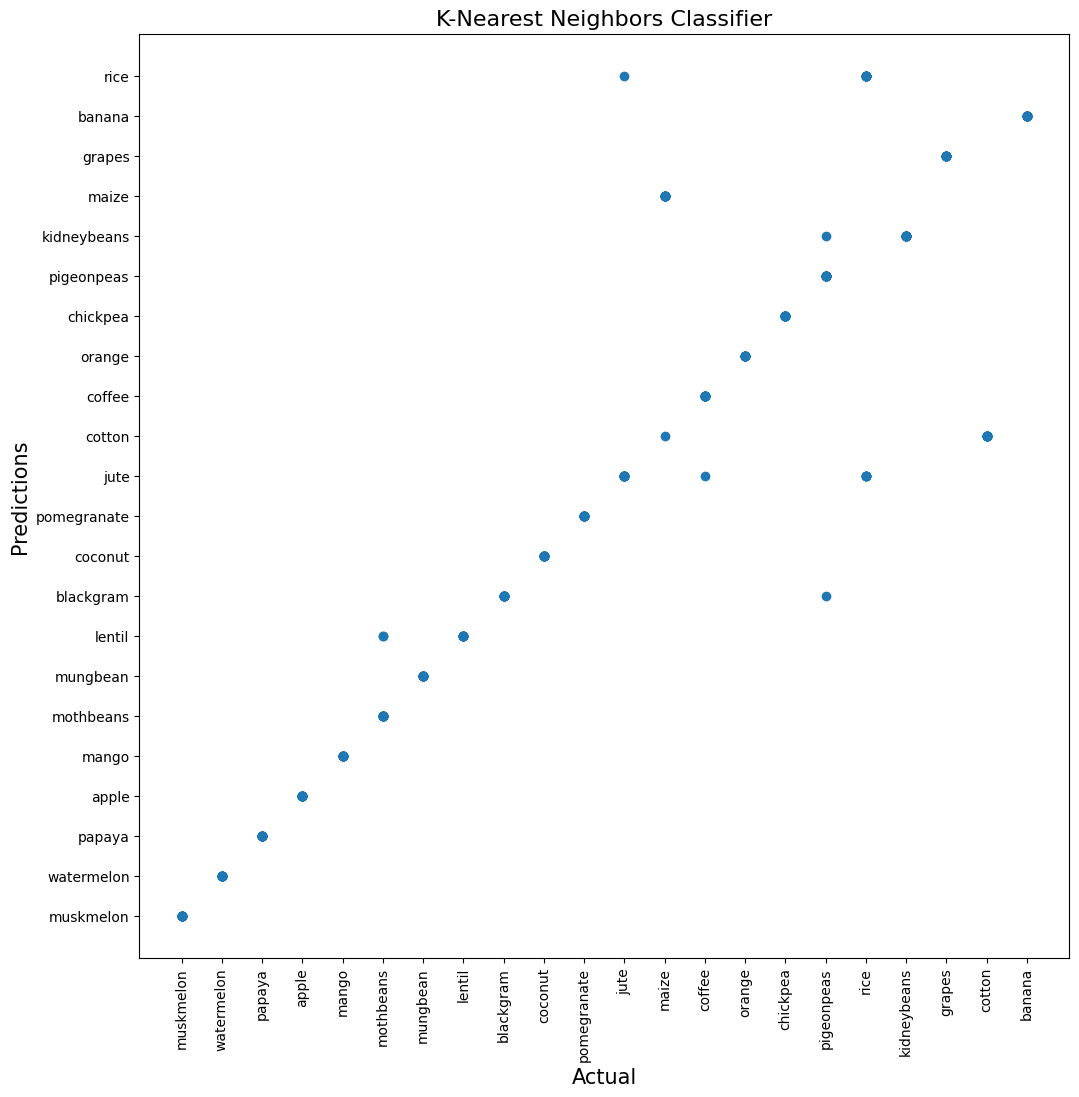

In [51]:
scatter_plot('K-Nearest Neighbors Classifier',y_predict_knn)

In [ ]:
knn_test_accuracy = accuracy_score(y_test,y_predict_knn)*100
knn_test_accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100)

clf_gini.fit(x_train, y_train)

In [47]:
clf_predict = clf_gini.predict(x_test)
clf_predict

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [48]:
print(confusion_matrix(y_test,clf_predict))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [49]:
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

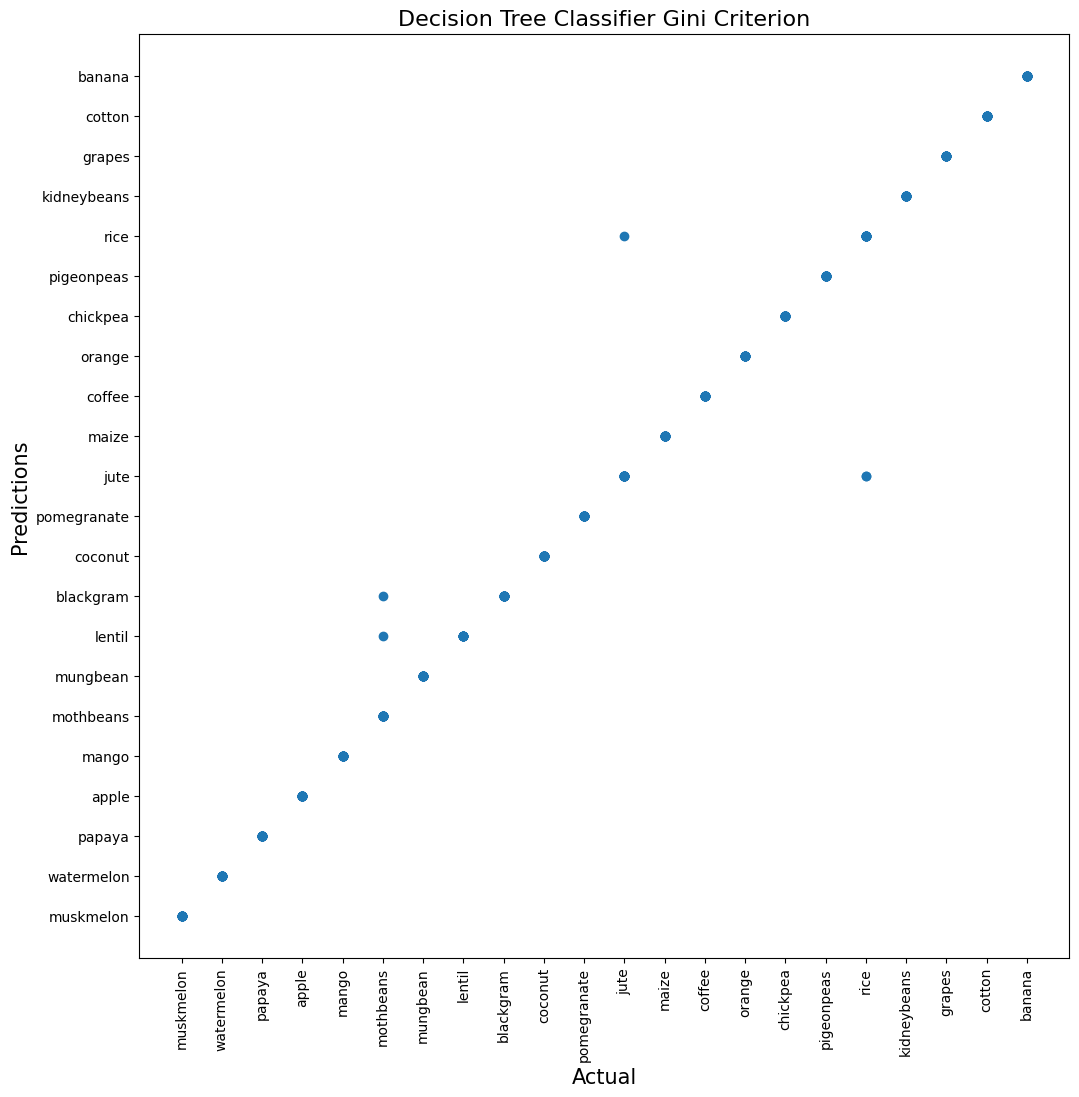

In [50]:
scatter_plot("Decision Tree Classifier Gini Criterion", clf_predict)

In [ ]:
dt_gini_score = accuracy_score(y_test, clf_predict)*100

dt_gini_score

  #RANDOM FOREST CLASSIFIER

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='entropy', random_state=100)

rf_clf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=100)

In [55]:
rf_train_accuracy = rf_clf.score(x_train, y_train)*100

rf_train_accuracy

100.0

In [56]:
y_predicted_rf_clf = rf_clf.predict(x_test)
y_predicted_rf_clf

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [57]:
print(confusion_matrix(y_test, y_predicted_rf_clf))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [58]:
print(classification_report(y_test,y_predicted_rf_clf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

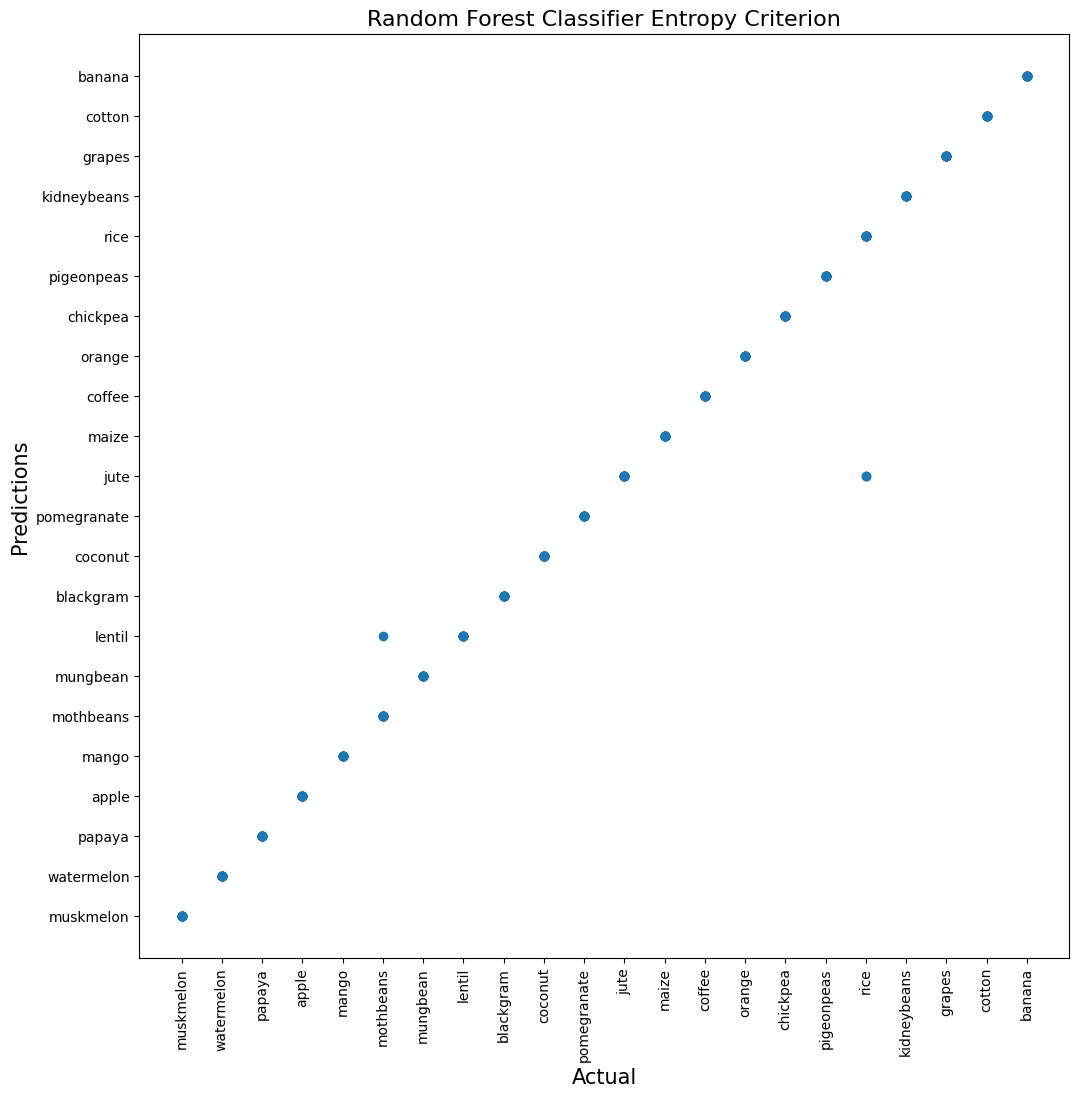

In [60]:
scatter_plot("Random Forest Classifier Entropy Criterion",y_predicted_rf_clf)

In [61]:

rf_test_accuracy = accuracy_score(y_test, y_predicted_rf_clf)*100

rf_test_accuracy

99.31818181818181

# Using Gini let me see the accuracy of the sample data set classified

In [62]:
rf_clf_gini = RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='gini',random_state=100)
rf_clf_gini

RandomForestClassifier(n_jobs=-1, random_state=100)

In [63]:
rf_clf_gini.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=100)

In [64]:
rf_gini_train_Score = rf_clf_gini.score(x_train, y_train)*100
rf_gini_train_Score

100.0

In [65]:
y_predict_gini_clf = rf_clf_gini.predict(x_test)
y_predict_gini_clf

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [66]:
print(classification_report(y_test, y_predict_gini_clf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

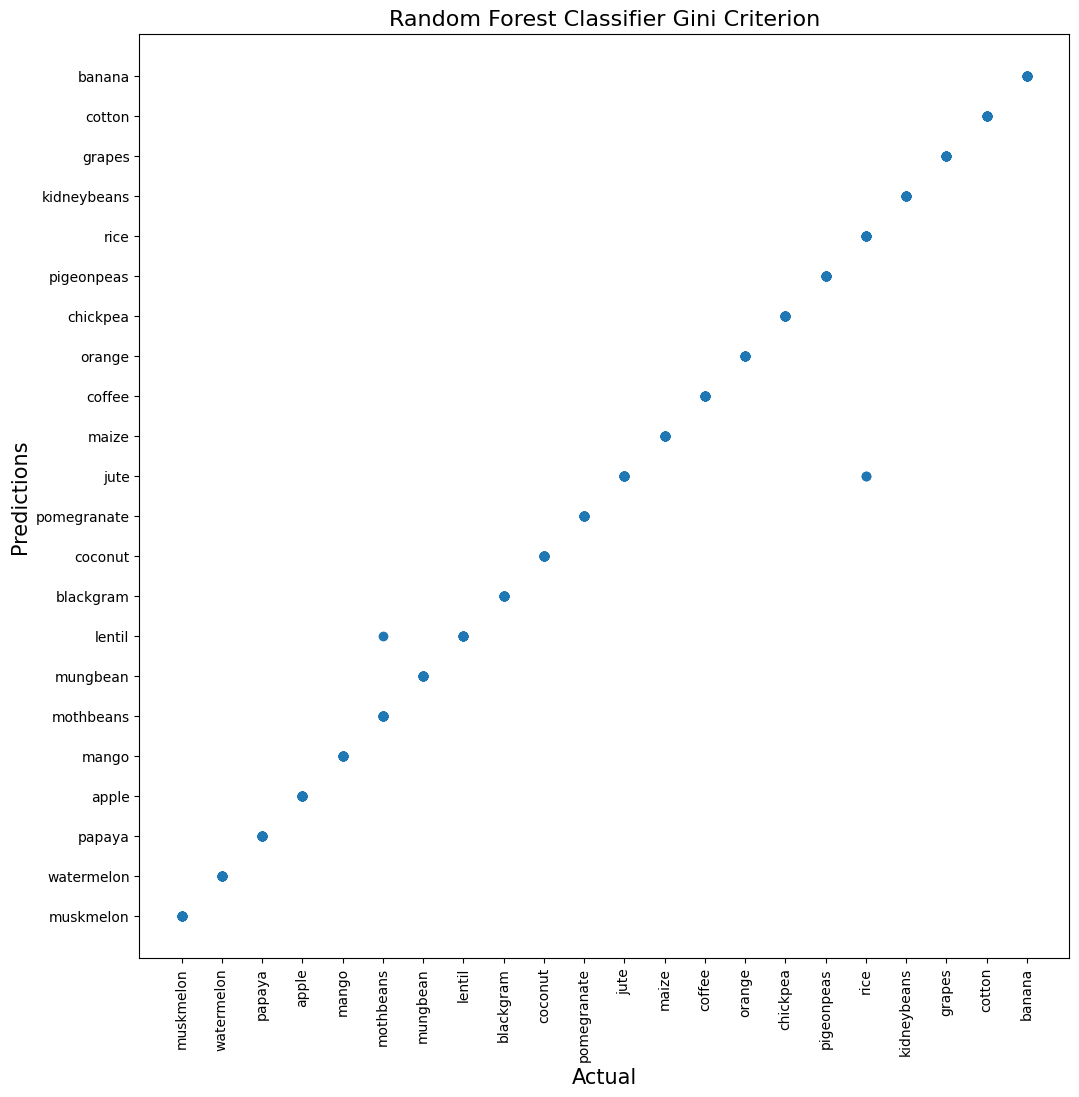

In [67]:
scatter_plot('Random Forest Classifier Gini Criterion',y_predict_gini_clf)

In [68]:
rfg_test_accuracy = accuracy_score(y_test,y_predict_gini_clf)*100
rfg_test_accuracy

99.31818181818181

In [83]:
dt_entropy_train_score = 99.15
dt_entropy_score = 98.30


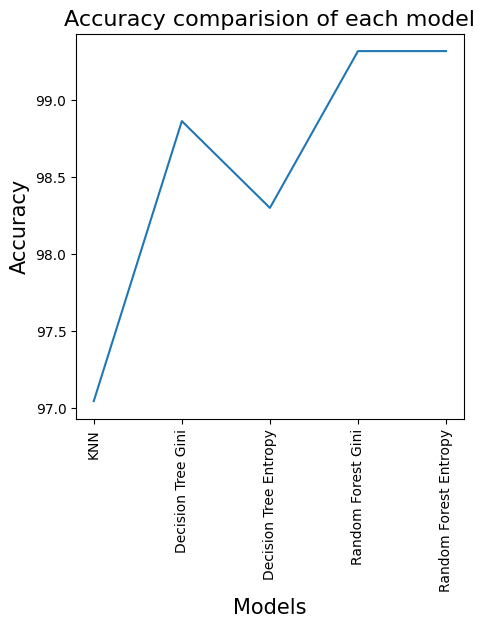

In [70]:

##Printing graph and table that shows the comparison between the models.
y_values = [knn_test_accuracy,dt_gini_score,dt_entropy_score,rfg_test_accuracy,rf_test_accuracy]
x_values = ['KNN','Decision Tree Gini','Decision Tree Entropy','Random Forest Gini','Random Forest Entropy']
plt.figure(figsize=(5,5))
plt.xticks(rotation = 90)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy',fontsize = 15)
plt.title('Accuracy comparision of each model',fontsize = 16)
plt.plot(x_values,y_values)
plt.show()

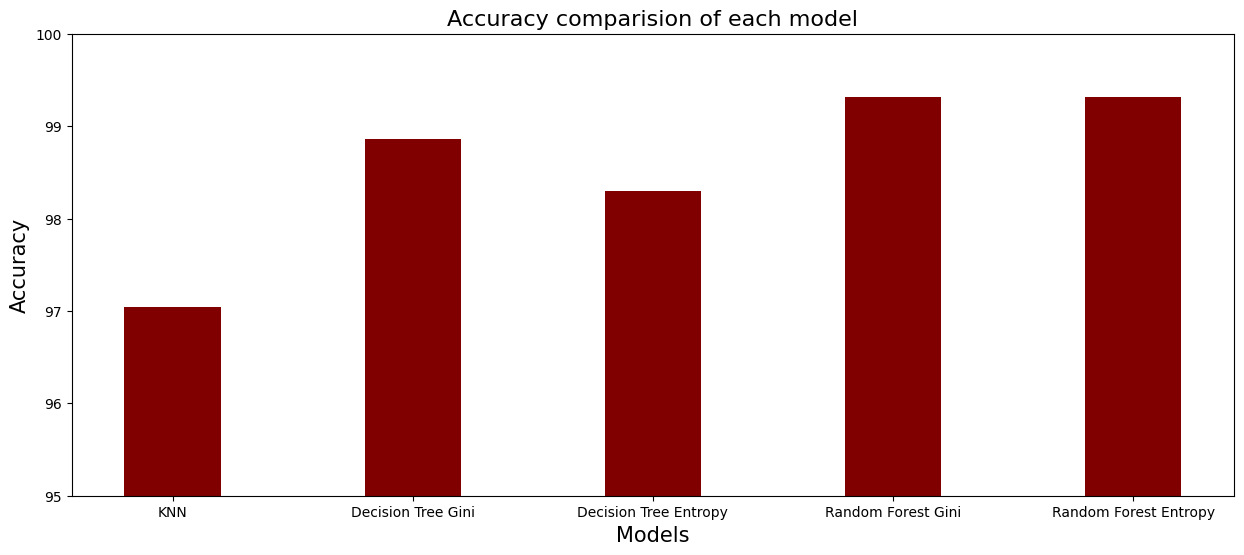

In [71]:
#BarPlot
plt.figure(figsize=(15,6))
plt.xticks(rotation = 0)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy',fontsize = 15)
plt.ylim(95,100);
plt.bar(x_values,y_values, color ='maroon', width = 0.4)
plt.title('Accuracy comparision of each model',fontsize = 16)
plt.show()

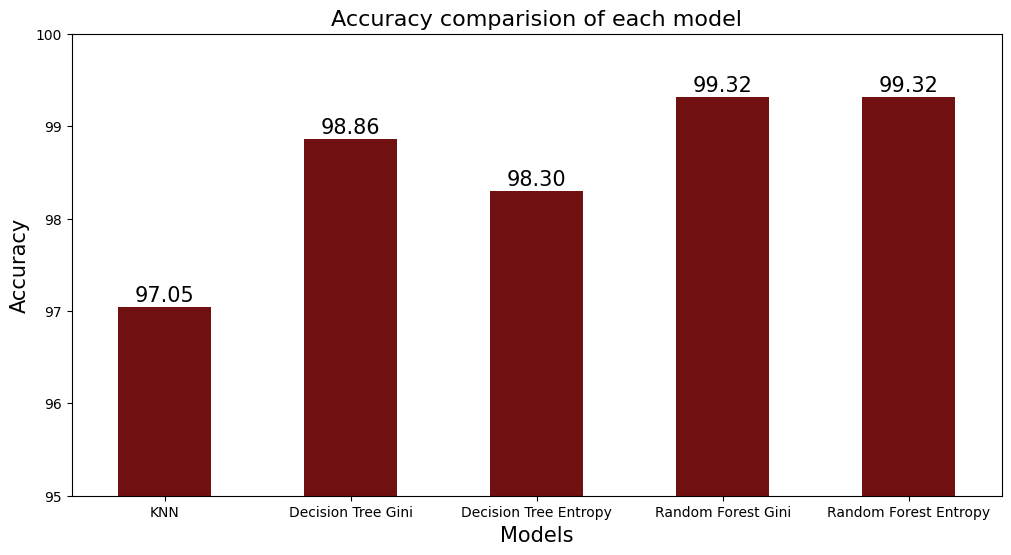

In [79]:
#Seaborn Plot with annotation
import seaborn as sns

plt.figure(figsize=(12,6))
plt.ylim(95,100);
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy',fontsize = 15)
plt.title('Accuracy comparision of each model',fontsize = 16)
plots = sns.barplot(x=x_values, y=y_values,color ='maroon')
for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(plots, .50)
plt.show()


In [ ]:
print('-----------------------------------------------------------------------------------')
print('| Models\t\t\t\t\t| Training Score | Model Accuracy |')
print('-----------------------------------------------------------------------------------')
print('| K Nearest Neighbors Classifier\t\t|',round(knn_train_accuracy,2),'\t |',round(knn_test_accuracy,2),'\t  |')
print('| Decision Tree Classifier Entropy criterion\t|',round(dt_entropy_train_score,2),'\t |',round(dt_entropy_score,2),'\t  |')
print('| Random Forest Classifier Entropy criterion\t|',round(rf_train_accuracy,2),'\t |',round(rf_test_accuracy,2),'\t  |')
print('| Random Forest Classifier Gini criterion\t|',round(rf_gini_train_sore,2),'\t |',round(rfg_test_accuracy,2),'\t  |')
print('-----------------------------------------------------------------------------------')